In [1]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa 

In [20]:
def chirp( n, f0=2, f1=40, t1=1 ):  
    # generate sinusoidal signal
    t = np.arange( n + 0. ) / n * t1
    return np.sin( 2*np.pi * f0 * (f1/f0)**t )

# creation of data
noise = .05 * 2  # * swing
N = 1000
dim = 1
x = np.reshape(chirp(N), (N//dim, dim)) # input matrix
v = np.random.normal( scale=noise, size=N )# define noise matrix
d = x[:,0] + v # add noise to target matrix

# LMS

In [21]:
# identification
f_lms = pa.filters.FilterLMS(n=dim, mu=0.1, w="random")
y, e, w = f_lms.run(d, x)

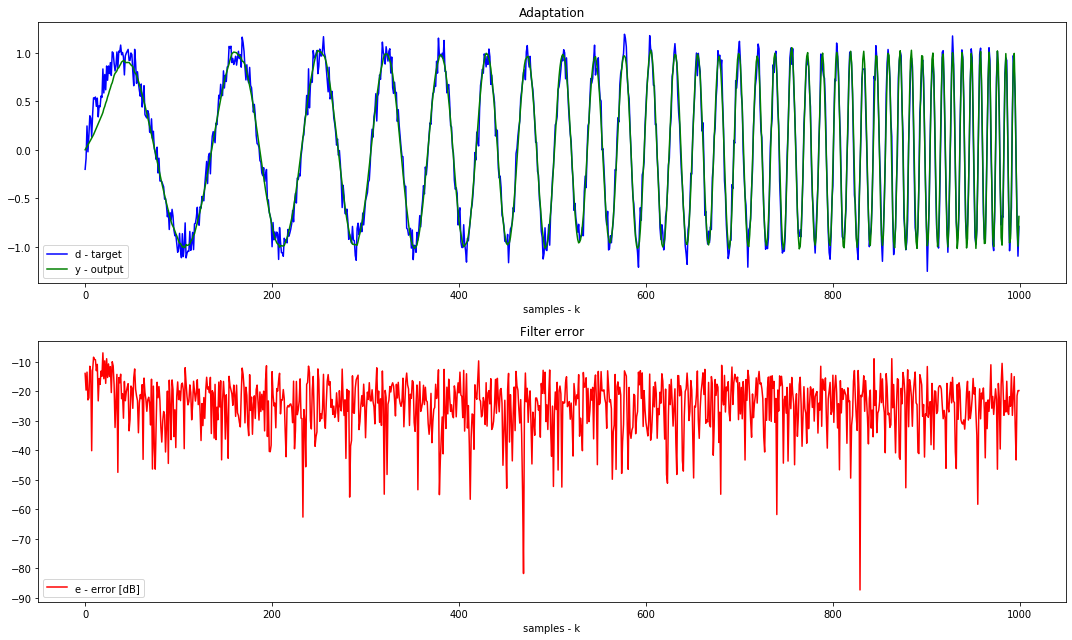

In [22]:
# show results
plt.figure(figsize=(15,9))

plt.subplot(211)
plt.title("Adaptation")
plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output")
plt.legend()

plt.subplot(212)
plt.title("Filter error")
plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]")
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# Error Evaluation

mae = pa.misc.MAE(e)
mse = pa.misc.MSE(e)
rmse = pa.misc.RMSE(e)

print("MAE : ", mae)
print("\nMSE : ", mse)
print("\nRMSE : ", rmse)

MAE :  0.08653557532969779

MSE :  0.012045893297722798

RMSE :  0.10975378489019319


# NLMS

In [24]:
# identification
f_nlms = pa.filters.FilterNLMS(n=dim, mu=0.1, w="random")
y, e, w = f_nlms.run(d, x)

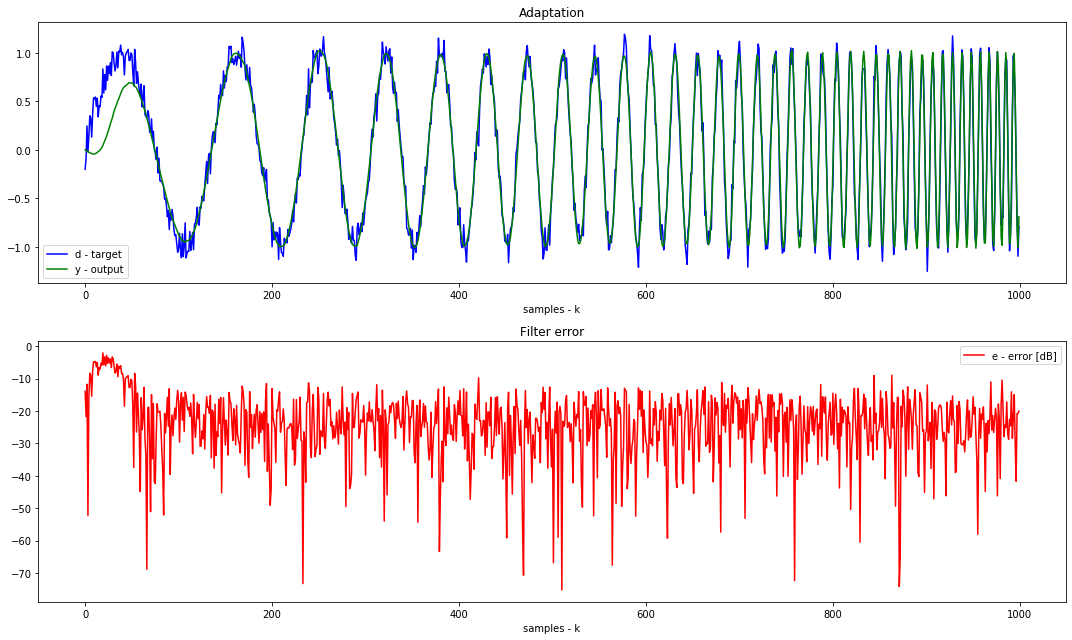

In [25]:
# show results
plt.figure(figsize=(15,9))

plt.subplot(211)
plt.title("Adaptation")
plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output")
plt.legend()

plt.subplot(212)
plt.title("Filter error")
plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]")
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
# Error Evaluation

mae = pa.misc.MAE(e)
mse = pa.misc.MSE(e)
rmse = pa.misc.RMSE(e)

print("MAE : ", mae)
print("\nMSE : ", mse)
print("\nRMSE : ", rmse)

MAE :  0.10012830050646485

MSE :  0.020911830836137207

RMSE :  0.1446092349614547


# RLS

In [29]:
f_rls = pa.filters.FilterRLS(n=dim, mu=0.99, w="random")
y, e, w = f_rls.run(d, x)

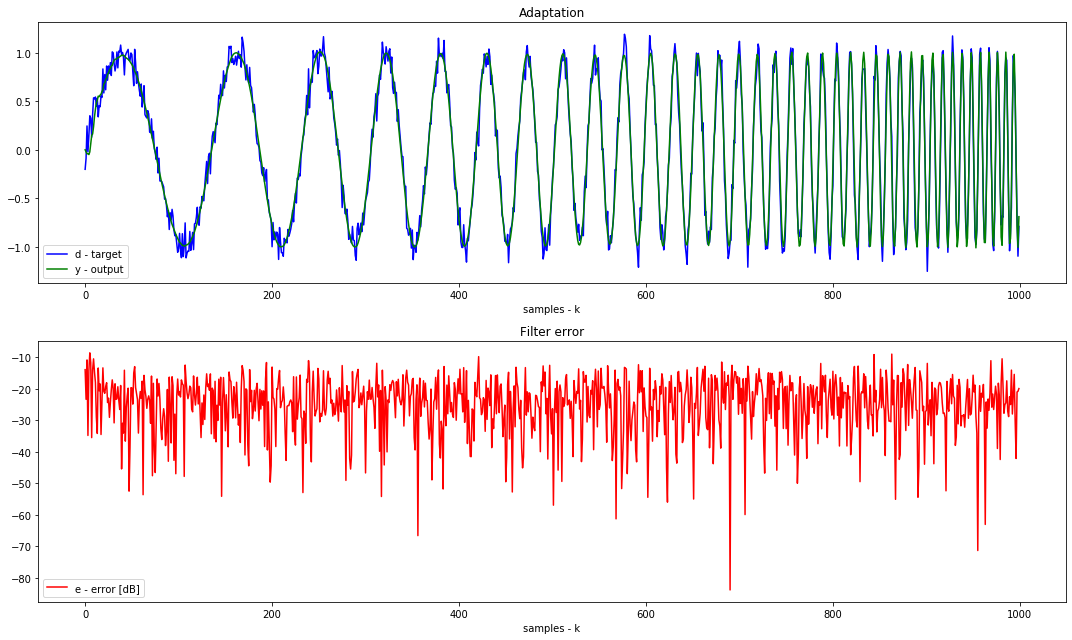

In [30]:
# show results
plt.figure(figsize=(15,9))

plt.subplot(211)
plt.title("Adaptation")
plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output")
plt.legend()

plt.subplot(212)
plt.title("Filter error")
plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]")
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
# Error Evaluation

mae = pa.misc.MAE(e)
mse = pa.misc.MSE(e)
rmse = pa.misc.RMSE(e)

print("MAE : ", mae)
print("\nMSE : ", mse)
print("\nRMSE : ", rmse)

MAE :  0.08228545213366564

MSE :  0.010657411547159707

RMSE :  0.1032347400207881
